# Regression Analysis


In this assignment you will train a model for a regression problem based on linear regression with polynomial feature extension. You are not allowed to use sklearn or any existing python libraries that implements Linear or Polynomial Regresssion in any form. You are expected to write the source code by yourselves, including the gradient descent algorithm. 


## Dataset
You are given a 1D dataset and the ground truth targets for the regression in train.csv file. You are also provided with test.csv file for the model evaluations. Do not use any data from the test data in your model trainings. 

## Requirements
Include all the source codes in the following cells; make sure that the codes are sufficiently documented in each section. After training your model, provide regression plots for the train and test data (separately) as well. Report your MSE and average Root Mean Square Error that you obtain using the test data in the Report Section (below). Also, provide all the hyperparameters and their values following the source codes in seperate cells.

Connect gdrive for train/test dataset:

In [1]:
from google.colab import drive # import lib
drive.mount("/content/gdrive") # mount gdrive

Mounted at /content/gdrive


Import libraries:

In [91]:
import numpy as np # for np array ops
import matplotlib.pyplot as plt # for visualization purposes
from pandas import * # for array ops
import random # for shuffling

Read .csv from gdrive and parse "x" and "t" into two lists:

Length of Training Data:  150
Train data visualized (x axis: X, y axis: T:
Length of Test Data:  100
Test data visualized (x axis: X, y axis: T:


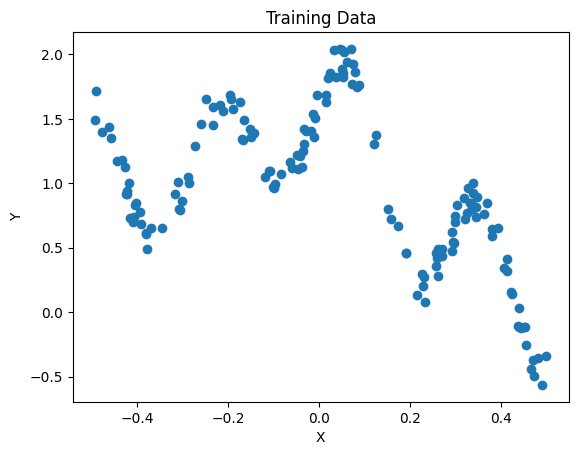

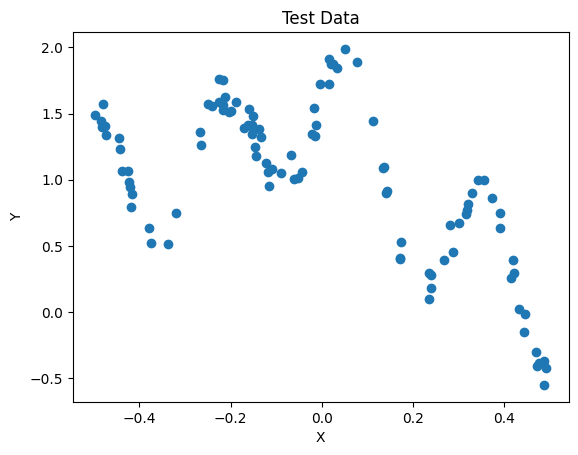

In [90]:
sTrainAdd = "/content/gdrive/MyDrive/cmp712/hw1/train.csv" # address of train.csv on gdriveg
sTestAdd  = "/content/gdrive/MyDrive/cmp712/hw1/test.csv" # address of test.csv on gdriveg
data = read_csv(sTrainAdd) # read train.csv
X = data['x'] # assign dataset argument into X
#vIdx = sorted(range(len(X)), key=lambda k: X[k])
#X = X[vIdx]
#min_x = min(X)
#X = X - min_x
#X.sort_values(ascending=True)
T = data['t'] # assign dataset value into T
#T = T[vIdx]
TRAIN_DATASET_LENGTH = len(X) # get length of dataset

data_test = read_csv(sTestAdd) # read train.csv
X_test = data_test['x']
#vIdx_test = sorted(range(len(X_test)), key=lambda k: X_test[k])
#X_test = X_test[vIdx_test]
#min_x_test = min(X_test)
#X_test = X_test - min_x_test
#X_test.sort_values(ascending=True)
T_test = data_test['t'] # assign dataset value into T
#T_test = T_test[vIdx_test]
TEST_DATASET_LENGTH = len(X_test) # get length of dataset


print('Length of Training Data: ', TRAIN_DATASET_LENGTH)
print('Train data visualized (x axis: X, y axis: T:')
plt.figure()
plt.title("Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X, T) # check if data is ok
print('Length of Test Data: ', TEST_DATASET_LENGTH)
print('Test data visualized (x axis: X, y axis: T:')
plt.figure()
plt.title("Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X_test, T_test) # check if data is ok

**updateParams**, **calcDeriv** and **calcPoly** methods are created in order to set a generic structure for testing different order polynomials:

Generic method to calculate partial derivatives of MSE loss function wrt to polynomial parameters:

In [30]:
def calcLossPartialDeriv(T_truth, T_Pred, x, nOrder):
  res = (-2) * (T_truth - T_Pred) * x**nOrder
  return res

Generic method to calculate different order polynomials:

In [5]:
def calcPoly(x, params):
  sum = 0
  nOrder = len(params) - 1
  for n in range(0, len(params)):
    sum += params[n] * np.power(x, nOrder - n)
  return sum

Loss Function is Mean Squared Error **(MSE)**:

In [6]:
def calcLoss(truth, pred, vParams, nReg):
  loss = 1/truth.size * np.sum(np.power(truth - pred, 2)) + nReg * sum(vParams)/len(vParams)
  return loss

Trainer method:

In [114]:
def trainer(X, T, nLearningRate, nPolyOrder, nLossLim, nIterLim, nReg):
  vLoss_training = np.zeros(nIterLim)
  vT_Pred = np.zeros(TRAIN_DATASET_LENGTH)
  vLoss_test = np.zeros(nIterLim)
  vPolyParams = np.zeros(nPolyOrder + 1) # Polynomial constants stored in np array
  vPolyParams = np.random.rand(nPolyOrder + 1)
  vLossPartialDerivs = np.zeros(nPolyOrder + 1) # Partial derivatives of loss function stored in np array
  nIter = 0 # Iteration counter
  nLoss_training = 999999 # Used for exit condition of minimum loss, initially set to a large number
  nLoss_test = 0
  while (nIter<nIterLim): # train until loss decreases to a certain value or number of iterations reached
    temp = list(zip(X, T))
    random.shuffle(temp)
    X, T = zip(*temp)
    # res1 and res2 come out as tuples, and so must be converted to lists.
    X, T = np.array(X), np.array(T)
    for idx in range(TRAIN_DATASET_LENGTH):
      T_Pred = calcPoly(X[idx], vPolyParams) # calculate predictor's values
      #nLoss_training = calcLoss(T[idx], T_Pred, vPolyParams, nReg) # calculate loss
      # save loss in ITERxDATALENGTH matrix
      for i in range(0, nPolyOrder+1): # calculate derivatives and update parameters
        vLossPartialDerivs[i] = calcLossPartialDeriv(T[idx], T_Pred, X[idx], nPolyOrder-i) # calculate partial derivatives
      vPolyParams = vPolyParams - nLearningRate * vLossPartialDerivs
    nIter = nIter + 1
    if(nIter%(nIterLim * 0.05)==0): # show progress at each %5 interval
        vT_Pred = calcPoly(X, vPolyParams)
        vLoss_training = calcLoss(T, vT_Pred, vPolyParams, nReg)       
        print("progress: %", int(nIter/nIterLim * 100), "Training Loss=", vLoss_training, "Params=", vPolyParams)
        #print("progress:", nIter/nIterLim*100, "Test Loss=", nLoss_test)    
  return vPolyParams, vLoss_training

Trainer wrapper:

In [115]:
# Hyperparam.s:
LEARNING_RATE = 0.006
REGULARIZATION = 0 #0.2
POLY_ORDER = 20
LIM_LOSS = 0.000001
LIM_ITER = 2000000
#vPolyParams, vLoss_training, vLoss_test = trainer(X, T, LEARNING_RATE, POLY_ORDER, LIM_LOSS, LIM_ITER, REGULARIZATION)
vPolyParams, vLoss_training = trainer(X, T, LEARNING_RATE, POLY_ORDER, LIM_LOSS, LIM_ITER, REGULARIZATION)
print(vPolyParams)

progress: % 5 Training Loss= 0.1159965064473687 Params= [ 1.89847367e-02  8.59893719e-01  6.75119618e-01  2.86149257e-01
  4.71441951e-01  1.78980338e-01  4.78502917e-01 -7.36096036e-02
  1.03235786e+00 -5.78823220e-01  9.08448397e-01 -2.57989360e+00
  1.41949683e+00 -9.55014019e+00  4.53408139e+00 -2.13187039e+01
  2.28311517e+01  7.25433465e-01 -9.70417061e+00 -4.60409244e-01
  1.51374324e+00]
progress: % 10 Training Loss= 0.11180005840685955 Params= [ 1.87778550e-02  8.57707435e-01  6.74186321e-01  2.76748244e-01
  4.67264448e-01  1.38949419e-01  4.60076291e-01 -2.40892109e-01
  9.53377507e-01 -1.25309958e+00  5.89346217e-01 -5.10802276e+00
  2.91839738e-01 -1.76173666e+01  1.82861703e+00 -3.75764671e+01
  2.47664607e+01  5.80742662e+00 -9.95049666e+00 -7.56550441e-01
  1.51096111e+00]
progress: % 15 Training Loss= 0.10919886976108525 Params= [ 1.85786815e-02  8.56033647e-01  6.73275490e-01  2.69438200e-01
  4.63141846e-01  1.07363946e-01  4.41725766e-01 -3.74631657e-01
  8.74125389

Visualize Results:

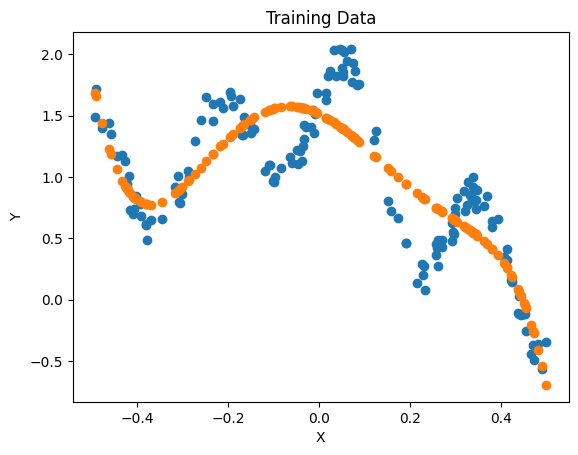

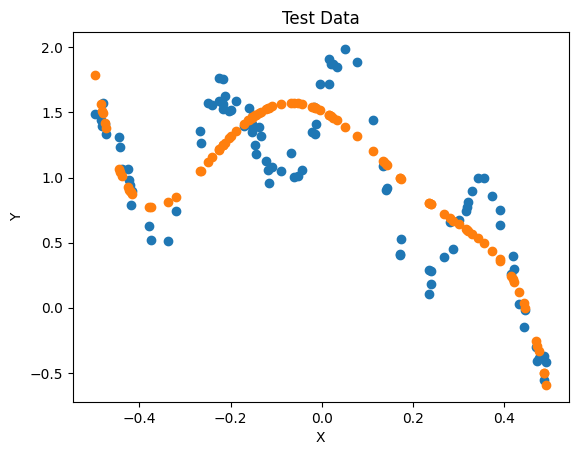

In [116]:
vIdx = sorted(range(len(X)), key=lambda k: X[k])
X = X[vIdx]
T_Pred = calcPoly(X, vPolyParams)
T_Pred = T_Pred[vIdx]
T = T[vIdx]
vIdx_test = sorted(range(len(X_test)), key=lambda k: X_test[k])
X_test = X_test[vIdx_test]
T_Pred_test = calcPoly(X_test, vPolyParams)
T_Pred_test = T_Pred_test[vIdx_test]
T_test = T_test[vIdx_test]
plt.figure()
plt.title("Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X, T) 
plt.scatter(X, T_Pred)
plt.figure()
plt.title("Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X_test, T_test)
plt.scatter(X_test, T_Pred_test)

Plot Losses:

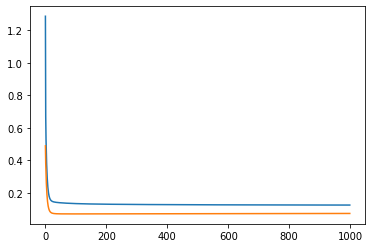

In [ ]:
plt.plot(vLoss_training)
plt.plot(vLoss_test)

# Report
Write your test results and utilized hyperparameter parameter values in this section. Briefly discuss how your algorithm works; and why it works as it is.